In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from scipy import signal as sg

In [2]:
import sys
sys.path.append('..')

In [3]:
data_base = '../data/raw/dataIBM'
data_exts = '.csv'
targ_df = pd.read_csv(data_base+data_exts, header=None).astype('float64')
idx = 2

In [4]:
if idx==0:
    from SpiCoder.Batch import TBR as SPCb
    from SpiCoder.Sequential import TBR as SPCs
    spcb = SPCb(3)
    spcs = SPCs(3)
    data_tags = '_TBR_factor3'
elif idx==1:
    from SpiCoder.Batch import SF as SPCb
    from SpiCoder.Sequential import SF as SPCs
    spcb = SPCb(3)
    spcs = SPCs(3)
    data_tags = '_SF_thr3'
elif idx==2:
    from SpiCoder.Batch import MW as SPCb
    from SpiCoder.Sequential import MW as SPCs
    spcb = SPCb(3, 10)
    spcs = SPCs(3, 10)
    data_tags = '_MW_thr3_wind10'
else:
    from SpiCoder.Batch import BSA as SPCb
    from SpiCoder.Sequential import BSA as SPCs
    fir = sg.firwin(10, 0.01, fs=1)
#     fir = np.ones(10)
    spcb = SPCb(1, fir)
    spcs = SPCs(1, fir)
    spcb.shift = float(np.min(targ_df))
    spcb.gain = float(np.max(targ_df) - np.min(targ_df))
    spcs.shift = float(np.min(targ_df))
    spcs.gain = float(np.max(targ_df) - np.min(targ_df))
    data_tags = '_BSA_fir10x1_thr1'

In [5]:
mate_df = pd.read_csv(data_base+data_tags+data_exts, header=None)
matd_df = pd.read_csv(data_base+data_tags+'_decode'+data_exts, header=None)

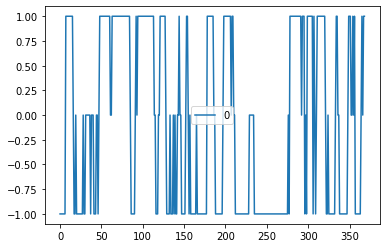

In [6]:
mate_df.plot();

In [7]:
spceb_df = pd.DataFrame(spcb.encode(targ_df.values.squeeze()))

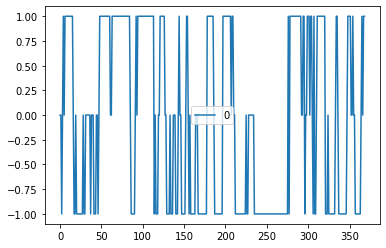

In [8]:
spceb_df.plot();

In [9]:
spces_df = pd.DataFrame(targ_df[0].apply(spcs.encode))

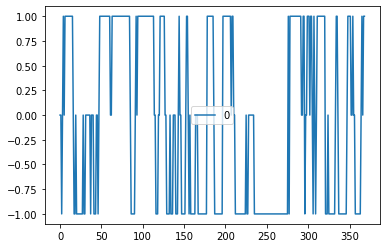

In [10]:
spces_df.plot();

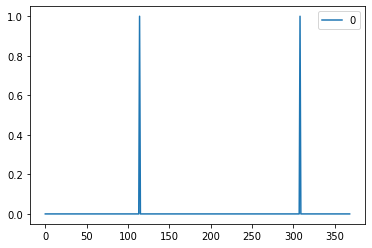

In [11]:
(spces_df-spceb_df).plot();

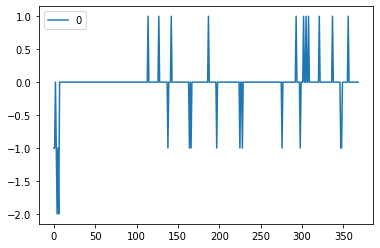

In [12]:
(mate_df-spceb_df).plot();

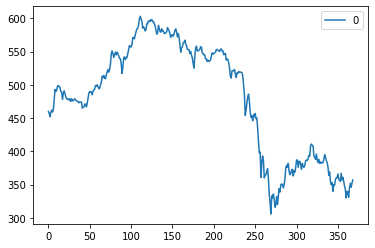

In [13]:
targ_df.plot();

In [14]:
spcdb_df = pd.DataFrame(spcb.decode(spceb_df.values.squeeze()))

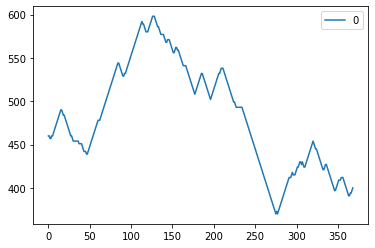

In [15]:
spcdb_df.plot();

In [16]:
spcds_df = pd.DataFrame(spces_df[0].apply(spcs.decode))

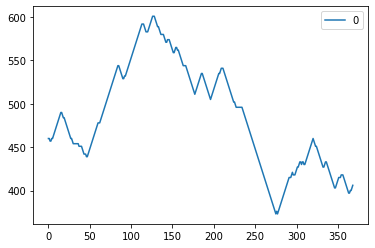

In [17]:
spcds_df.plot();

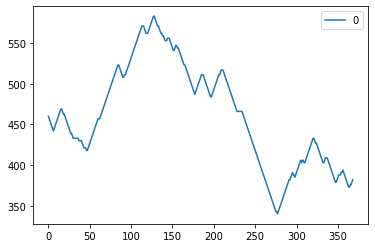

In [18]:
matd_df.plot();

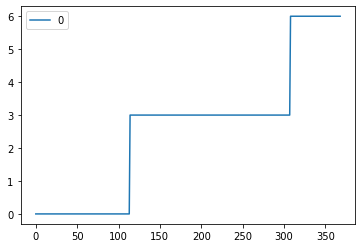

In [19]:
(spcds_df-spcdb_df).plot();

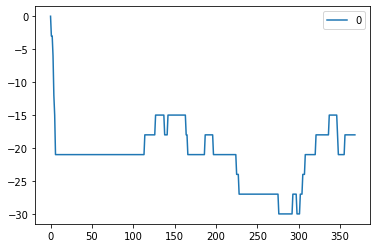

In [20]:
(matd_df-spcdb_df).plot();

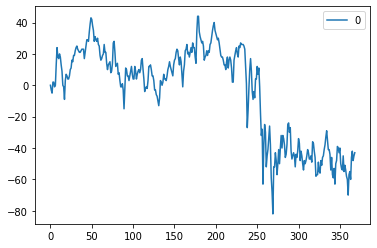

In [21]:
(targ_df-spcdb_df).plot();

In [22]:
corr0 = np.correlate(mate_df.values.squeeze()-np.mean(mate_df.values), 
                    spceb_df.values.squeeze()-np.mean(spceb_df.values), "full")

In [23]:
estimated_delay0 = corr0.argmax() - (len(spceb_df) - 1)
print("estimated delay is " + str(estimated_delay0))

estimated delay is 0


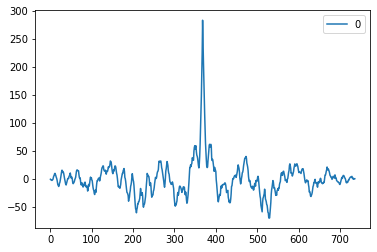

In [24]:
pd.DataFrame(corr0).plot()

In [25]:
corr1 = np.correlate(matd_df.values.squeeze()-np.mean(matd_df.values), 
                    spcdb_df.values.squeeze()-np.mean(spcdb_df.values), "full")

In [26]:
estimated_delay1 = corr1.argmax() - (len(spcdb_df) - 1)
print("estimated delay is " + str(estimated_delay1))

estimated delay is 0


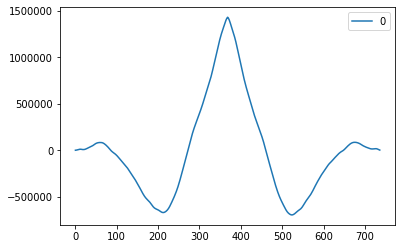

In [27]:
pd.DataFrame(corr1).plot()

In [28]:
corr2 = np.correlate(targ_df.values.squeeze()-np.mean(targ_df.values), 
                    spcdb_df.values.squeeze()-np.mean(spcdb_df.values), "full")

In [29]:
estimated_delay2 = corr2.argmax() - (len(spcdb_df) - 1)
print("estimated delay is " + str(estimated_delay2))

estimated delay is 0


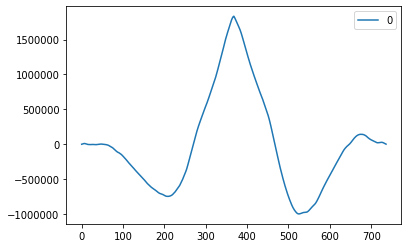

In [30]:
pd.DataFrame(corr2).plot();

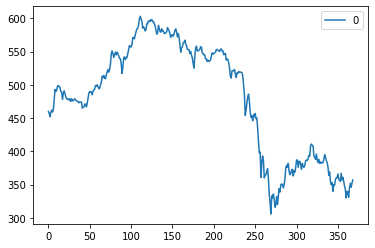

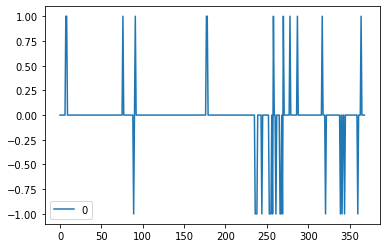

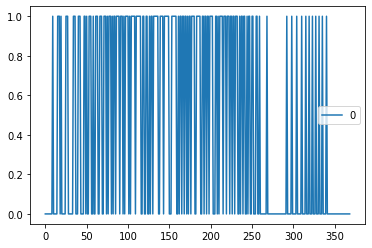

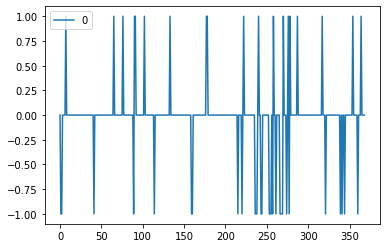

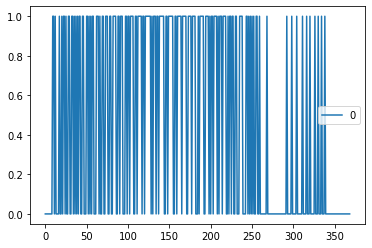

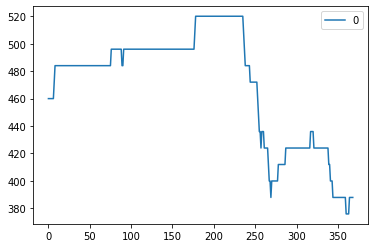

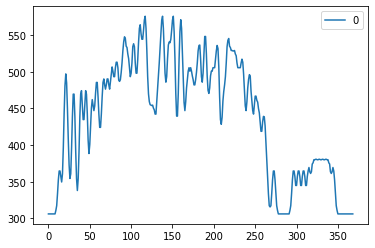

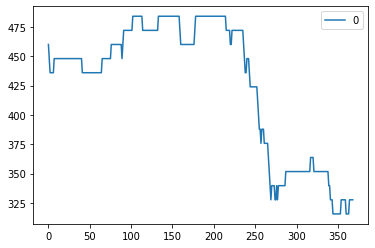

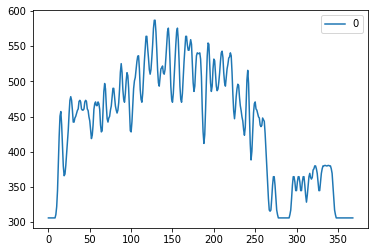

In [31]:
## Batch Encoding and Decoding
from SpiCoder.Batch import TBR as TBRb
from SpiCoder.Batch import BSA as BSAb

## Sequential Encoding and Decoding
from SpiCoder.Sequential import TBR as TBRs
from SpiCoder.Sequential import BSA as BSAs
import pandas as pd


## Load data
data_base = '../data/raw/dataIBM'
data_exts = '.csv'
targ_df = pd.read_csv(data_base+data_exts, header=None).astype('float64')

targ_df.plot()


## Initialize
# TBR
tbrb = TBRb(1.7)
tbrs = TBRs(1.7)

# BSA
fir = sg.firwin(10, 0.01, fs=1)
bsab = BSAb(1, fir)
bsas = BSAs(1, fir)

# initialization is necessary at sequential
bsas.shift = float(np.min(targ_df))
bsas.gain = float(np.max(targ_df) - np.min(targ_df))


## Encode
# batch encode
tbrbe_df = pd.DataFrame(tbrb.encode(targ_df.values.squeeze()))
bsabe_df = pd.DataFrame(bsab.encode(targ_df.values.squeeze()))

# encode result
tbrbe_df.plot()
bsabe_df.plot()

# sequential encode
tbrse_df = pd.DataFrame(targ_df[0].apply(tbrs.encode))
bsase_df = pd.DataFrame(targ_df[0].apply(bsas.encode))

# encode result
tbrse_df.plot()
bsase_df.plot()


## Decode
# batch decode
tbrbd_df = pd.DataFrame(tbrb.decode(tbrbe_df.values.squeeze()))
bsabd_df = pd.DataFrame(bsab.decode(bsabe_df.values.squeeze()))

# decode result
tbrbd_df.plot()
bsabd_df.plot()

# sequential decode
tbrsd_df = pd.DataFrame(tbrse_df[0].apply(tbrs.decode))
bsasd_df = pd.DataFrame(bsase_df[0].apply(bsas.decode))

# decode result
tbrsd_df.plot()
bsasd_df.plot()